In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


# Loading the data

In [8]:
# create database connection
conn = sqlite3.connect('Inventory.db')
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,gross_profit,profit_margin,stock_turnover,sales_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [9]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


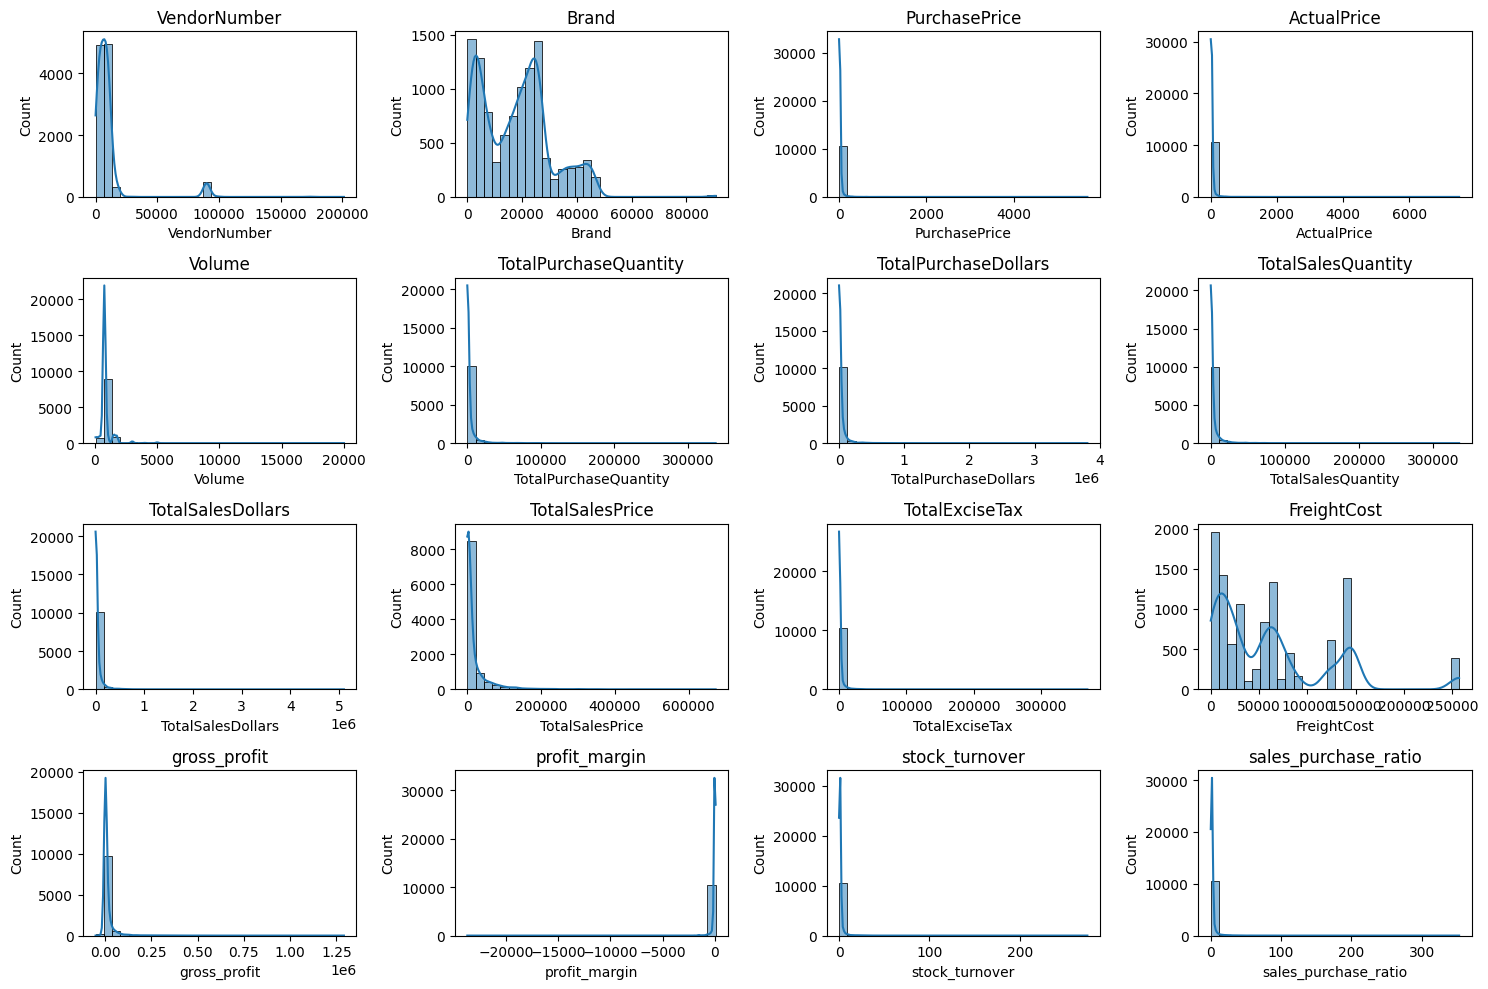

In [10]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjust grid layout as needed
    sns.histplot(df[col], kde= True , bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()    

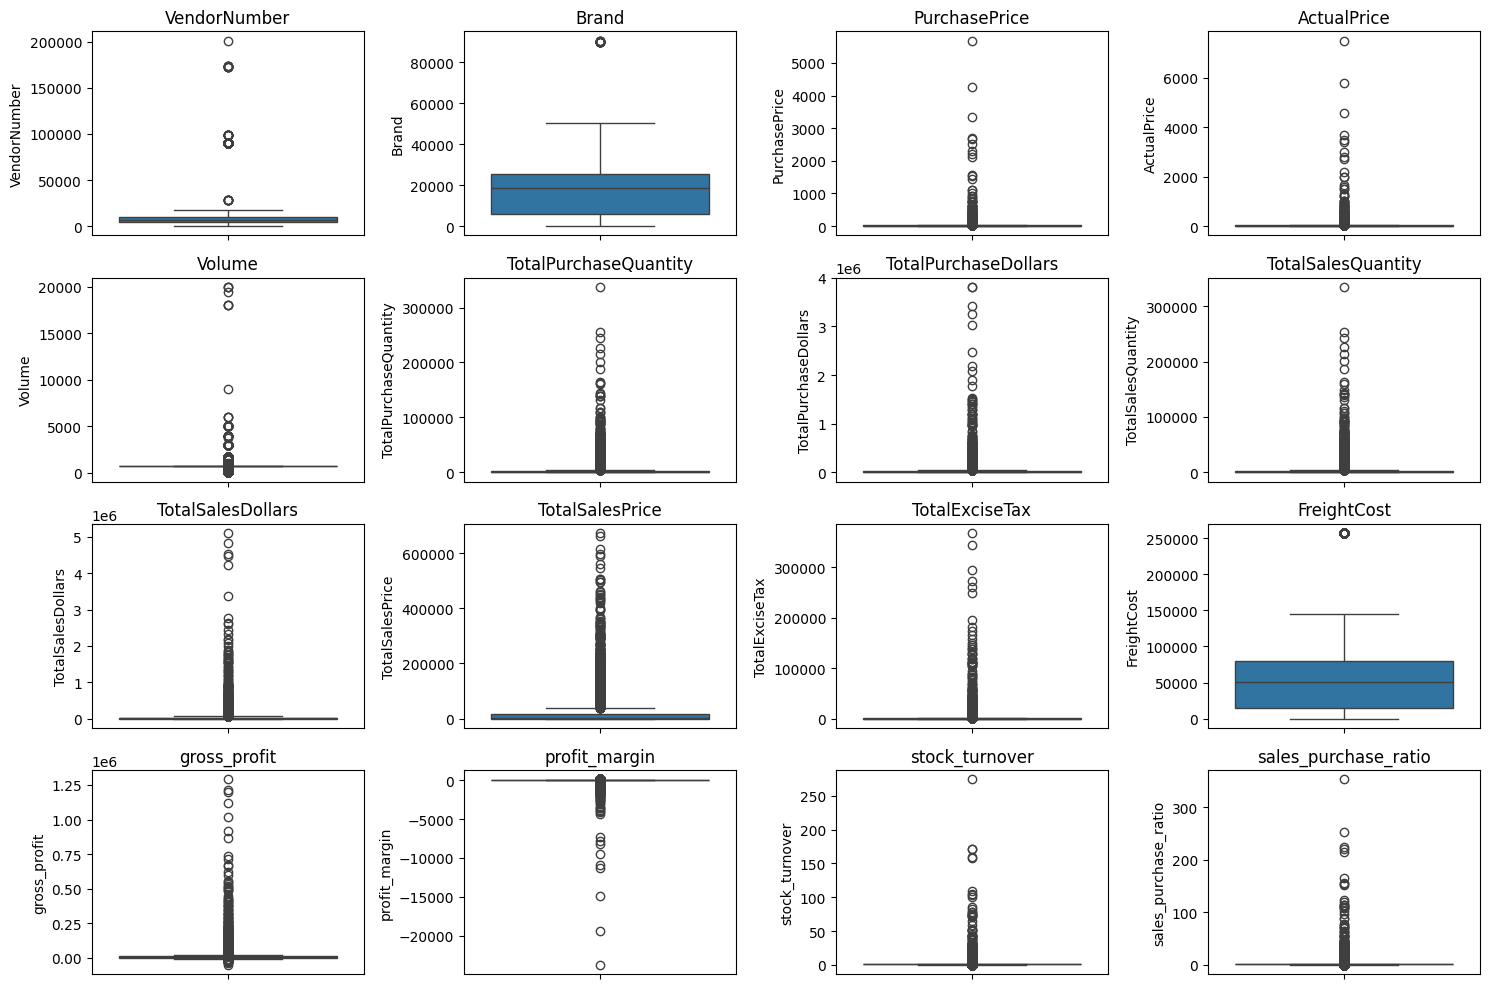

In [11]:
# Outlier detection with Boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjust grid layout as needed
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query('''select * from
                  vendor_sales_summary
                  where gross_profit >0
                  and profit_margin >0
                  and TotalSalesQuantity >0''',conn)
print(df)


      VendorNumber                VendorName  Brand  \
0             1128         BROWN-FORMAN CORP   1233   
1             4425     MARTIGNETTI COMPANIES   3405   
2            17035         PERNOD RICARD USA   8068   
3             3960  DIAGEO NORTH AMERICA INC   4261   
4             3960  DIAGEO NORTH AMERICA INC   3545   
...            ...                       ...    ...   
8559          9815            WINE GROUP INC   8527   
8560          8004            SAZERAC CO INC   5683   
8561          3924  HEAVEN HILL DISTILLERIES   9123   
8562          3960  DIAGEO NORTH AMERICA INC   6127   
8563          7245      PROXIMO SPIRITS INC.   3065   

                      Description  PurchasePrice  ActualPrice  Volume  \
0         Jack Daniels No 7 Black          26.27        36.99  1750.0   
1           Tito's Handmade Vodka          23.19        28.99  1750.0   
2                Absolut 80 Proof          18.24        24.99  1750.0   
3          Capt Morgan Spiced Rum          16.1

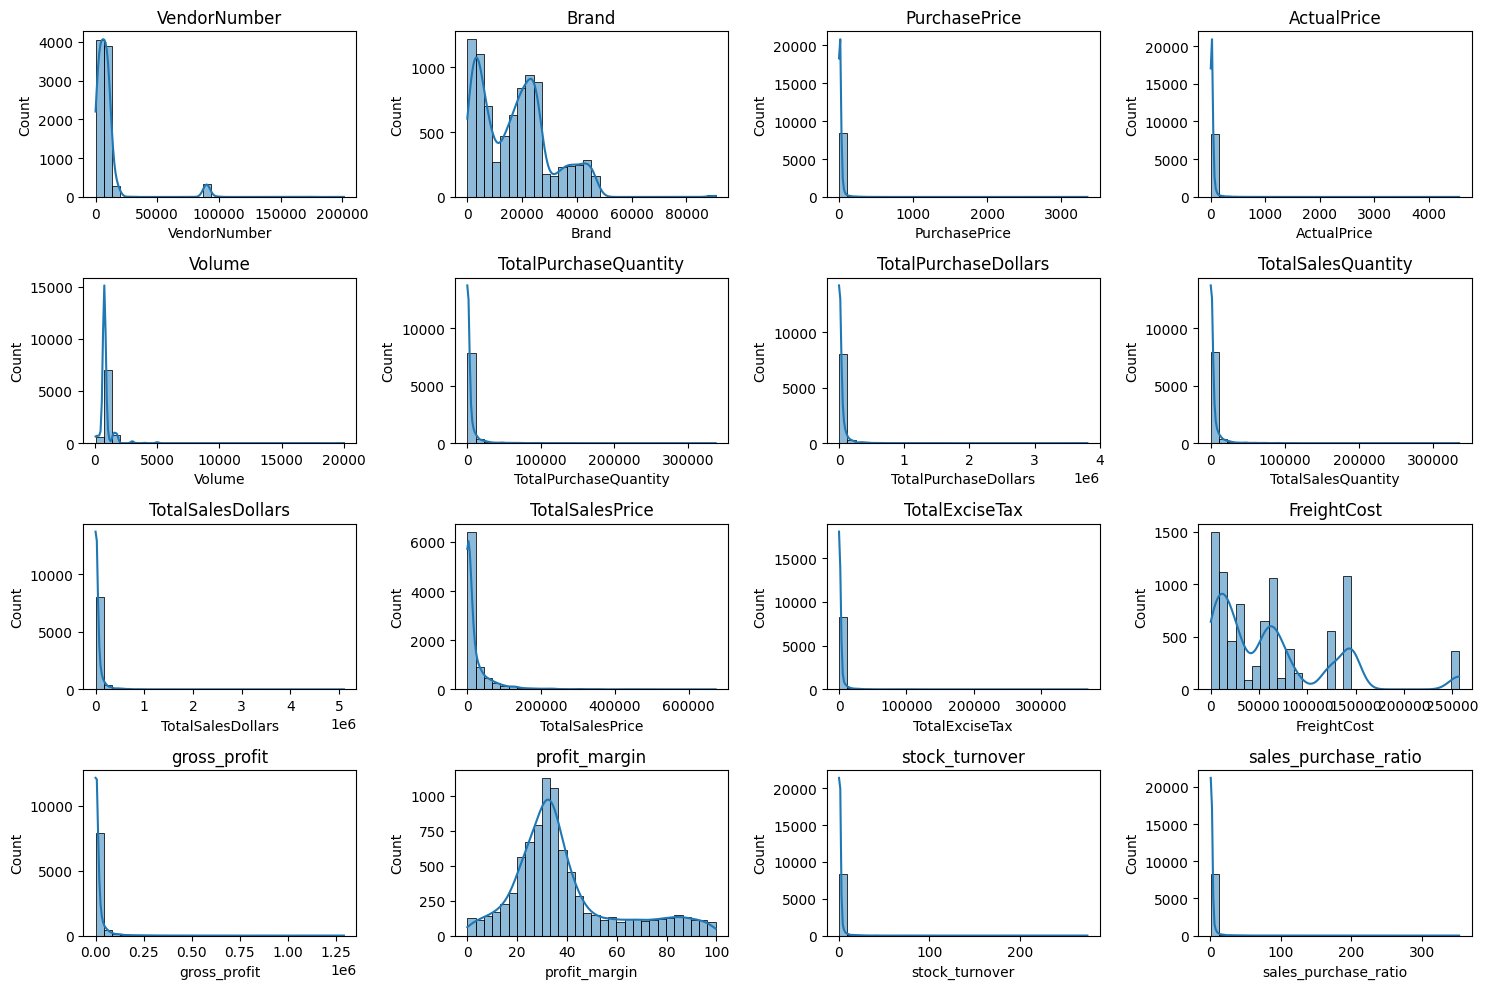

In [13]:
# Distribution plots for numerical columns after cleaning the data
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjust grid layout as needed
    sns.histplot(df[col], kde= True , bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show() 

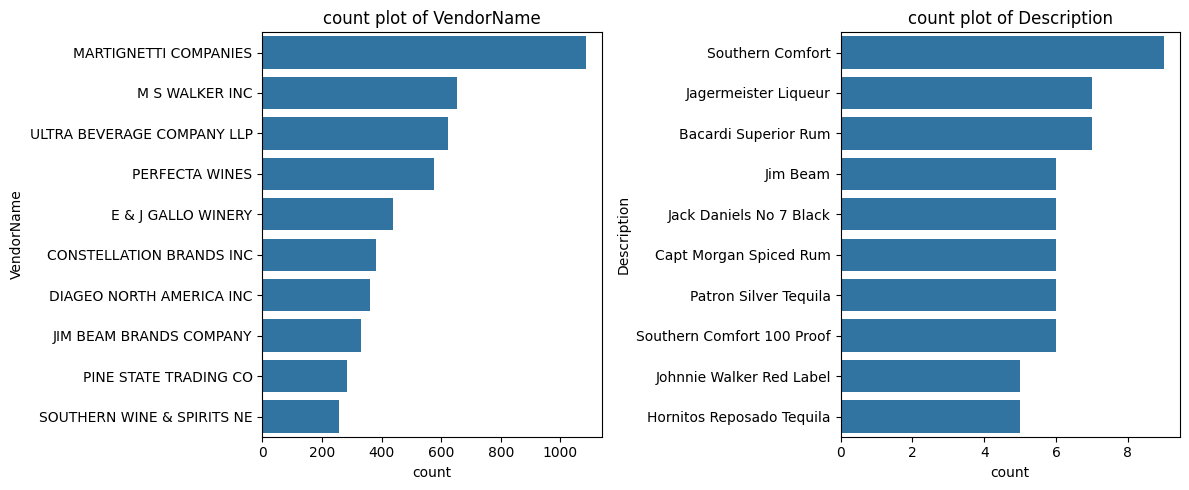

In [14]:
# Count plot for categorical columns
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1) # Adjust grid layout as needed
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show() 

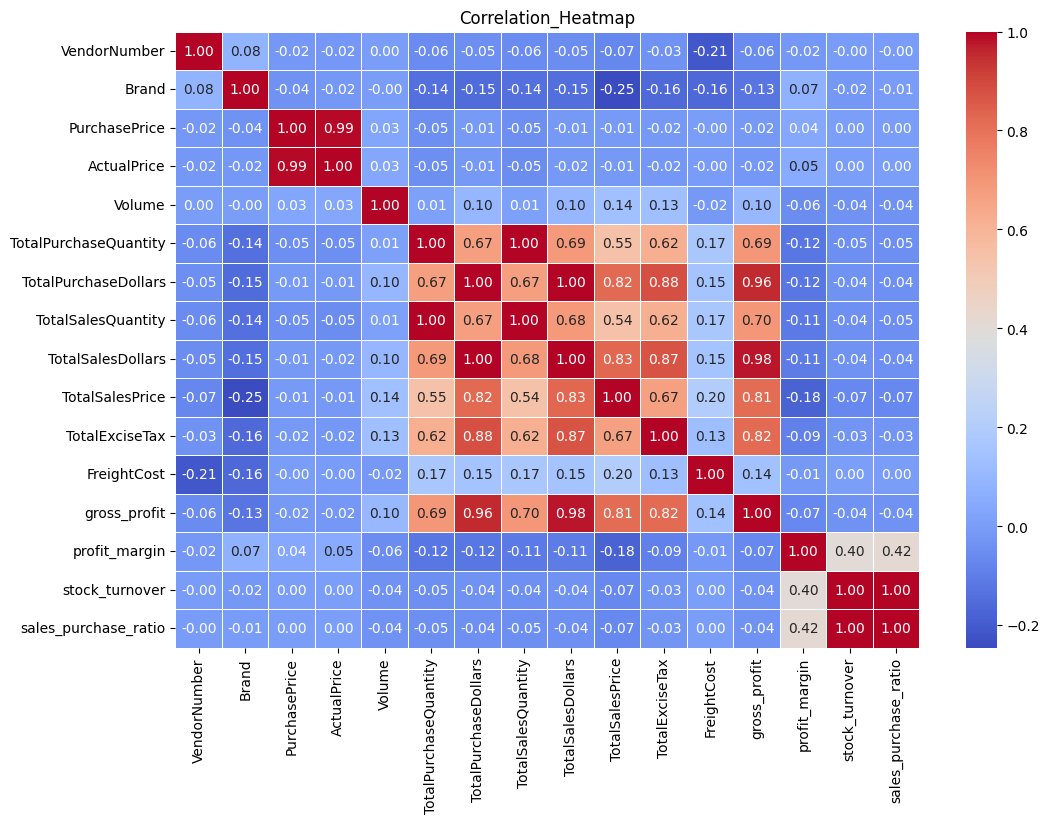

In [15]:
# correlation Heatmap 
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, fmt = ".2f", cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation_Heatmap")
plt.show() 

# Data Analysis


Identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margin 

In [16]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'profit_margin':'mean'}).reset_index()
print(brand_performance)


                       Description  TotalSalesDollars  profit_margin
0                           (RI) 1           21519.09      18.060661
1          .nparalleled Svgn Blanc            1094.63      29.978166
2              10 Span Cab Svgn CC            2703.89      20.937612
3                 10 Span Chard CC            3325.56      27.806445
4     10 Span Pnt Gris Monterey Cy            2082.22      32.226182
...                            ...                ...            ...
7702       Zorvino Vyds Sangiovese           10579.03      29.525675
7703             Zuccardi Q Malbec            1639.18      23.981503
7704                       Zum Rsl           10857.34      32.675038
7705                 Zwack Liqueur             227.88      16.653502
7706             von Buhl Jazz Rsl            1359.11      90.773374

[7707 rows x 3 columns]


In [17]:
# choosing a thresold value whice decide low sales and high profit
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['profit_margin'].quantile(0.85)
print(low_sales_threshold)
print(high_margin_threshold)

560.299
64.97017552750113


In [18]:
target_brands = brand_performance[(
    brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['profit_margin'] >= high_margin_threshold
)]
print(" Brands with low sales and high profit margin ")
display(target_brands.sort_values('TotalSalesDollars'))

 Brands with low sales and high profit margin 


,Description,TotalSalesDollars,profit_margin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


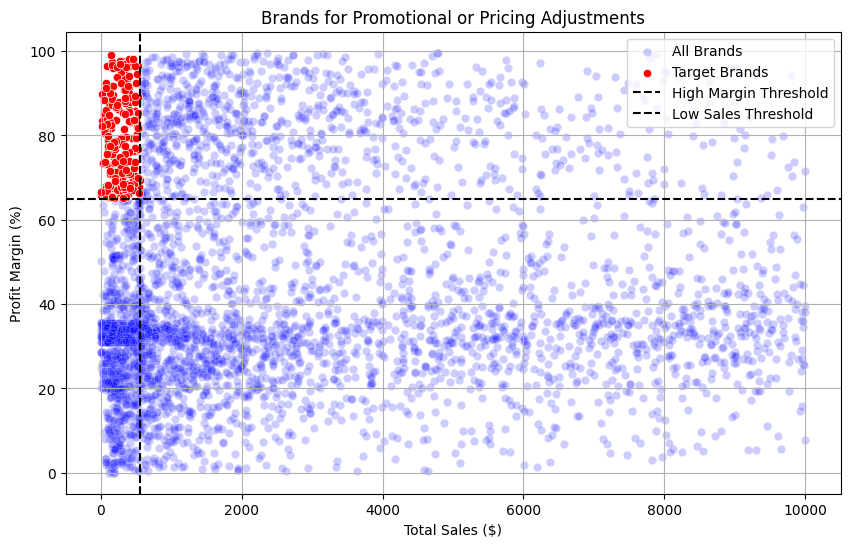

In [19]:
# Filter data for visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]  # for better visualization

# Set plot size
plt.figure(figsize=(10, 6))

# Scatter plots
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='profit_margin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='profit_margin', color='red', label='Target Brands')

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

# Legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# which vendor and brands demonstrate  the high sales performance

In [20]:
def format_dollars(value):
    try:
        value = float(value)
        if value >= 1_000_000:
            return f"{value / 1_000_000:.2f}M"
        elif value >= 1_000:
            return f"{value / 1_000:.2f}k"
        else:
            return f"{value:.2f}"
    except (ValueError, TypeError):
        return value  # Return original value if it can't be formatted




In [21]:
# Top vendors and Brand by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
print(top_vendors)
print(top_brands)

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64
Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64


In [22]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

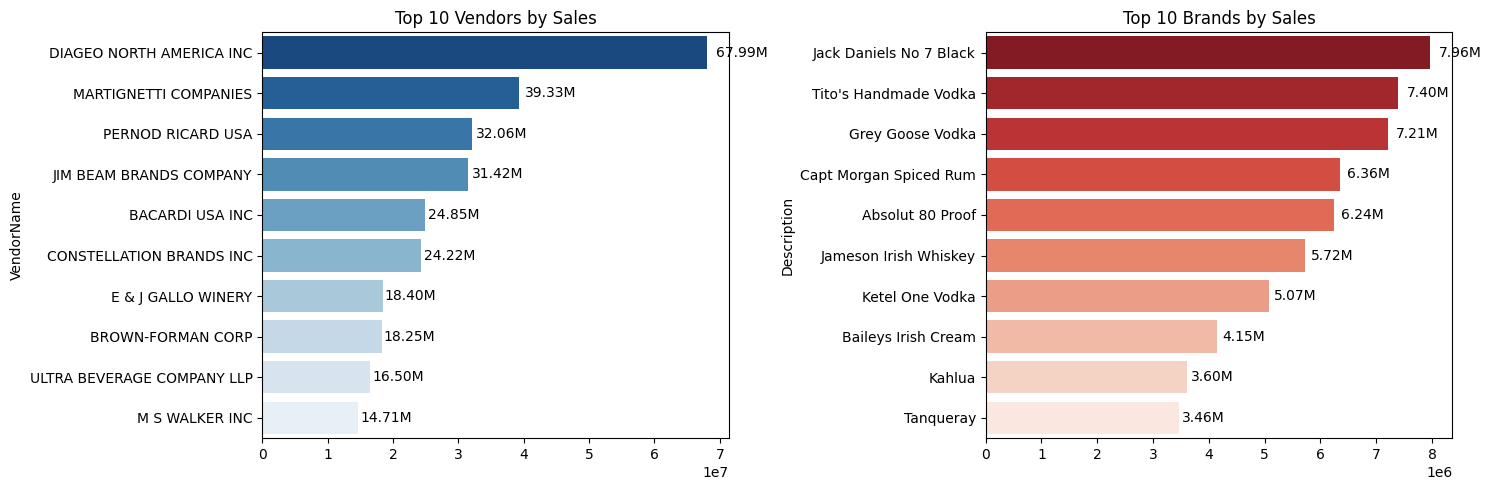

In [23]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Which vendor contribute the most to total purchase dollars

In [24]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'gross_profit' : 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
print(vendor_performance)

                      VendorName  TotalPurchaseDollars  gross_profit  \
0        ADAMBA IMPORTS INTL INC                446.16        258.37   
1           ALISA CARR BEVERAGES              25698.12      78772.82   
2             ALTAMAR BRANDS LLC              11706.20       4000.61   
3      AMERICAN SPIRITS EXCHANGE                934.08        577.08   
4      AMERICAN VINTAGE BEVERAGE             104435.68      35167.85   
..                           ...                   ...           ...   
114               WEIN BAUER INC              42694.64      13522.49   
115  WESTERN SPIRITS BEVERAGE CO             298416.86     106837.97   
116     WILLIAM GRANT & SONS INC            5876538.26    1693337.94   
117               WINE GROUP INC            5203801.17    3100242.11   
118            ZORVINO VINEYARDS              86122.71      38066.88   

     TotalSalesDollars  
0               704.53  
1            104470.94  
2             15706.81  
3              1511.16  
4         

In [25]:
# Step 2: Calculate purchase contribution % 
total_purchase = vendor_performance['TotalPurchaseDollars'].sum()
vendor_performance['purchase_contribution%'] = (vendor_performance['TotalPurchaseDollars'] / total_purchase * 100).round(4)

# Step 3: Round and sort
vendor_performance = vendor_performance.round(2).sort_values('purchase_contribution%', ascending=False)
print(vendor_performance)


                   VendorName  TotalPurchaseDollars  gross_profit  \
25   DIAGEO NORTH AMERICA INC           50097226.16   17892873.26   
57      MARTIGNETTI COMPANIES           25502095.83   13828263.53   
68          PERNOD RICARD USA           23851164.17    8212032.02   
46    JIM BEAM BRANDS COMPANY           23494304.32    7928716.14   
6             BACARDI USA INC           17432020.26    7422796.88   
..                        ...                   ...           ...   
101    THE IMPORTED GRAPE LLC              12379.45       6324.20   
107                  UNCORKED                118.74         58.20   
108        VINEDREA WINES LLC               4657.60       6728.00   
105                 TY KU LLC              13068.46       8408.12   
113   WALPOLE MTN VIEW WINERY               9292.31       2191.57   

     TotalSalesDollars  purchase_contribution%  
25         67990099.42                   16.30  
57         39330359.36                    8.30  
68         32063196.19  

In [26]:
# Display Top 10 vendor
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['gross_profit'] = top_vendors['gross_profit'].apply(format_dollars)
print(top_vendors)



                     VendorName TotalPurchaseDollars gross_profit  \
25     DIAGEO NORTH AMERICA INC               50.10M       17.89M   
57        MARTIGNETTI COMPANIES               25.50M       13.83M   
68            PERNOD RICARD USA               23.85M        8.21M   
46      JIM BEAM BRANDS COMPANY               23.49M        7.93M   
6               BACARDI USA INC               17.43M        7.42M   
20     CONSTELLATION BRANDS INC               15.27M        8.95M   
11            BROWN-FORMAN CORP               13.24M        5.01M   
30           E & J GALLO WINERY               12.07M        6.33M   
106  ULTRA BEVERAGE COMPANY LLP               11.17M        5.34M   
53               M S WALKER INC                9.76M        4.94M   

    TotalSalesDollars  purchase_contribution%  
25             67.99M                   16.30  
57             39.33M                    8.30  
68             32.06M                    7.76  
46             31.42M                    7.64  


In [27]:
top_vendors['purchase_contribution%'].sum()

np.float64(65.69000000000001)

In [28]:
top_vendors['cumulative_contribution %'] = top_vendors['purchase_contribution%'].cumsum()
print(top_vendors)

                     VendorName TotalPurchaseDollars gross_profit  \
25     DIAGEO NORTH AMERICA INC               50.10M       17.89M   
57        MARTIGNETTI COMPANIES               25.50M       13.83M   
68            PERNOD RICARD USA               23.85M        8.21M   
46      JIM BEAM BRANDS COMPANY               23.49M        7.93M   
6               BACARDI USA INC               17.43M        7.42M   
20     CONSTELLATION BRANDS INC               15.27M        8.95M   
11            BROWN-FORMAN CORP               13.24M        5.01M   
30           E & J GALLO WINERY               12.07M        6.33M   
106  ULTRA BEVERAGE COMPANY LLP               11.17M        5.34M   
53               M S WALKER INC                9.76M        4.94M   

    TotalSalesDollars  purchase_contribution%  cumulative_contribution %  
25             67.99M                   16.30                      16.30  
57             39.33M                    8.30                      24.60  
68             

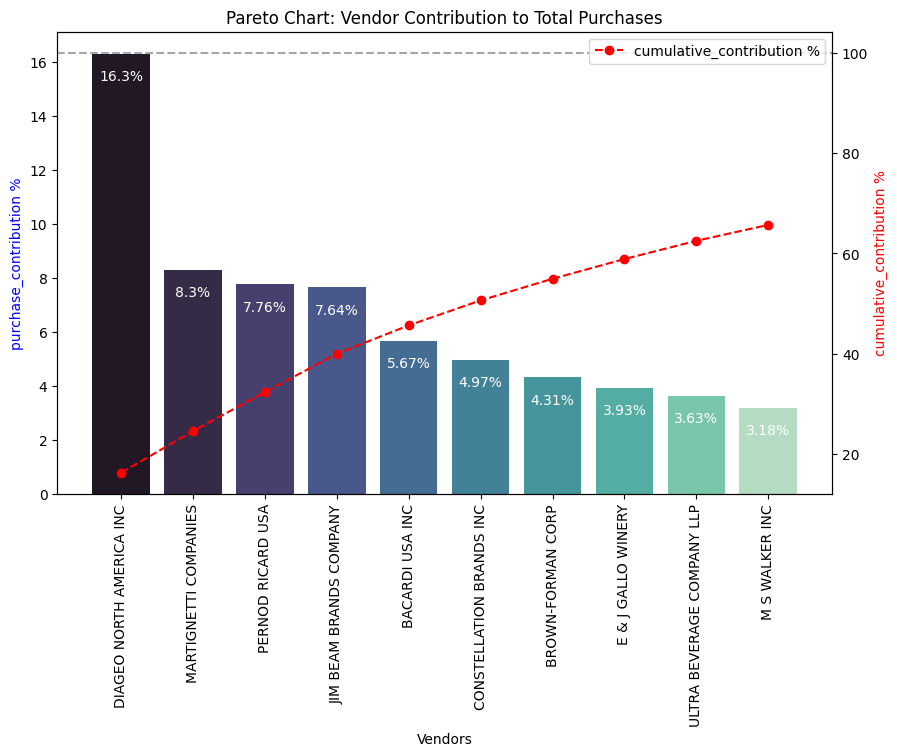

In [29]:
#Assuming top_vendors DataFrame contains the required columns
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(
    x=top_vendors['VendorName'], 
    y=top_vendors['purchase_contribution%'], 
    palette="mako", 
    ax=ax1
)

# Annotate bar values
for i, value in enumerate(top_vendors['purchase_contribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'], 
    top_vendors['cumulative_contribution %'], 
    color='red', 
    marker='o', 
    linestyle='dashed', 
    label='cumulative_contribution %'
)

# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('purchase_contribution %', color='blue')
ax2.set_ylabel('cumulative_contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [30]:
print(f"Total purchase contribution of top 10 vendor is {round(top_vendors['purchase_contribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendor is 65.69%


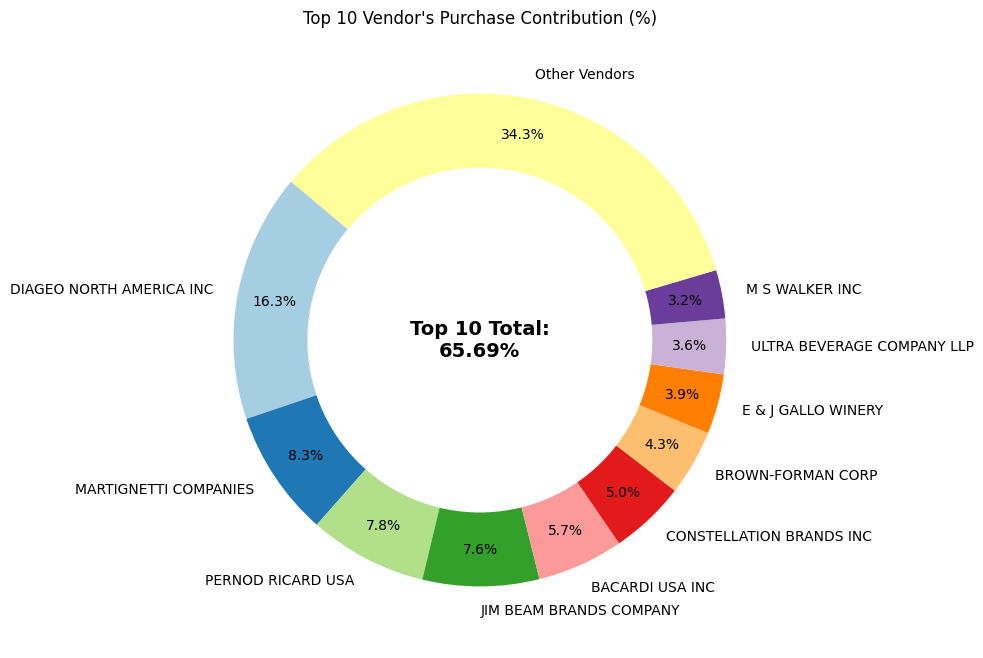

In [32]:
# Prepare data
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['purchase_contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

# Title and Show
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

# Does purchasing in bulk reduce  the unit price,and what is the optimal purchase volume for cost saving

In [33]:
df['unit_purchase_price'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [34]:
df['order_size'] = pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['small','medium','large'])

In [35]:
df.groupby('order_size')[['unit_purchase_price']].mean()

,unit_purchase_price
order_size,
small,39.068186
medium,15.486414
large,10.777625


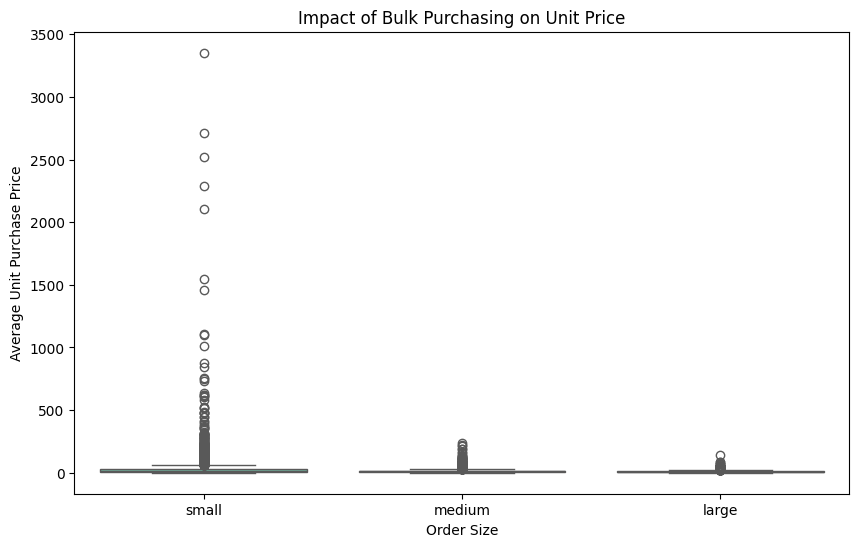

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="order_size", y="unit_purchase_price", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

# which vendors have low inventory turnover, indicating excess stock and low moving products

In [37]:
df[df['stock_turnover']<1].groupby('VendorName')[['stock_turnover']].mean().sort_values('stock_turnover',ascending = True).head(10)

,stock_turnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


# How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [38]:
df['unsold_inventory_value'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice'] 
print('Total Unsold Capital :',format_dollars(df["unsold_inventory_value"].sum()))

Total Unsold Capital : 2.71M


In [39]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["unsold_inventory_value"].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="unsold_inventory_value", ascending=False)
inventory_value_per_vendor["unsold_inventory_value"] = inventory_value_per_vendor["unsold_inventory_value"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


# What is the 95% confidance interval for profit margins of top performing and low performing vendors

In [40]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["profit_margin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["profit_margin"].dropna()

print(top_vendors)
print(low_vendors)

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: profit_margin, Length: 2141, dtype: float64
5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: profit_margin, Length: 2141, dtype: float64


In [41]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val +margin_of_error

Top Vendors 95 % CI: = (30.74, 31.61),Mean = 31.18
Low Vendors 95 % CI: = (40.50, 42.64),Mean = 41.57,


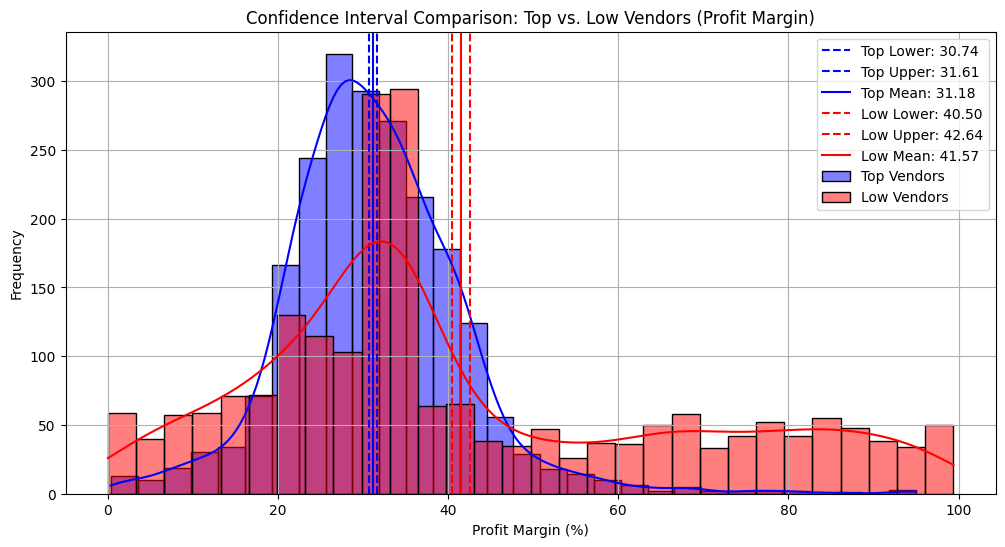

In [43]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95 % CI: = ({top_lower:.2f}, {top_upper:.2f}),Mean = {top_mean:.2f}")
print(f"Low Vendors 95 % CI: = ({low_lower:.2f}, {low_upper:.2f}),Mean = {low_mean:.2f},")

plt.figure(figsize=(12, 6))

# Top Vendors Histogram
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Histogram
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Final Plot Adjustments
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)


Is there a significant difference in profit margins between top performing and low performing vendor

Hypothesis
(Null Hypothesis): There is no significant difference in the mean profit margins of top - performing and low _performing vendors.
(Alternative Hypothesis): The mean profit margins of top performing and low performing vendors are significantly different.


In [44]:

# Define thresholds for top and low-performing vendors based on TotalSalesDollars
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter vendors based on thresholds
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["profit_margin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["profit_margin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
